## Neural Network with Regresssion

> Arichitecture of NN

> Input and Ouput Shape

> Create Custom data

> Steps in modeling

> Different evaluation model

> Saving and loading model

In regresssion problem we try to find relationship of one or more dependent variable with independent variables
> Predicting a number

In [ ]:
# Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.9.2


#### Create data to view and fit

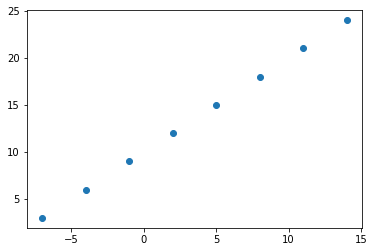

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

#Create feature 
X=np.arange(-7.0,14.1,step=3)
#Create labels 
y=np.arange(3.0,24.1,step=3)

#Visualize it
plt.scatter(X,y)

In [ ]:
y==X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output Shape

In [ ]:
# Create a demo tensor for out house price prediction problem 
house_info=tf.constant(['bedroom','bathroom','garage'])
house_price=tf.constant([923042])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([923042], dtype=int32)>)

In [ ]:
# O-rank or scalar tensor we have no shape
X[0],y[0]

(-7.0, 3.0)

In [ ]:
 X=tf.constant(X)
 y=tf.constant(y)
 X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
X.ndim

1

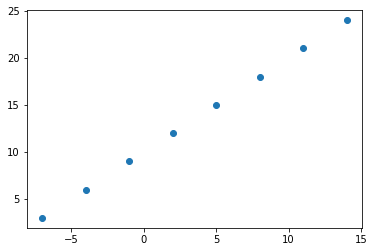

In [ ]:
 plt.scatter(X,y)

### Steps in modelling with Tf
1. Creating a model=input + hidden + output layer
2. Compiing a model=loss function + optimizer
3. Fitting a model

**Alternative**

model=tf.keras.Sequential()

model.add(tf.kearas.layers.Dense(1))

In [ ]:
# Set random seed
tf.random.set_seed(42)

model=tf.keras.Sequential([
  tf.keras.layers.Dense(1,activation='relu'),

])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), # can alse write "sgd"
              metrics=["mae"])

model.fit(tf.expand_dims(X,axis=-1),y,epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 324ms/step - loss: 10.6497 - mae: 10.6497
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 10.3958 - mae: 10.3958
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 10.1419 - mae: 10.1419
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 9.8880 - mae: 9.8880
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 9.6341 - mae: 9.6341


In [ ]:
## Checkout
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try and make prediciton using our model
y_pred=model.predict([17.0])

1/1 [==============================] - 0s 96ms/step


In [ ]:
y_pred+11

array([[24.97227]], dtype=float32)

 # Improve our model
 > We can improve our model mby altering the steps we took to create a model
 1. **Create a model** - We might add more layers or neurons, change activation function
 2. **Compiling a model** - Change optimazition or **learning rate**
 3. **Fitiing a model** - no. of epoches,increase data

In [ ]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 282ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 6

In [ ]:
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 250ms/step


array([[29.739855]], dtype=float32)

#### 2nd try

In [ ]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50,activation=None))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(1))
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 426ms/step - loss: 12.1271 - mae: 12.1271
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 10.9559 - mae: 10.9559
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 9.5263 - mae: 9.5263
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 10.3343 - mae: 10.3343
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.3225 - mae: 10.3225
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 9.0609 - mae: 9.0609
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 7.6286 - mae: 7.6286
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 7.5142 - mae: 7.5142
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 7.8105 - mae: 7.8105
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 7.4679 - mae: 7.4679
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 7.8308 -

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 320ms/step


array([[28.321966]], dtype=float32)

**We care more about prediction that are made on  unseen data**

> **Learning Rate is most important parameter**


 ## Evaluating Performance
 In practice ,a typical workflow you'll follow is :
'''
Build a model -> Compiled it -> Evaluate it -> Tweak it _> fit it -> Evaluate it -> Tweak model

When it comes to evaluation .. there are 3 words you should memorise
> **Visualise, Visualise Visualise**
* The data- what data are we working with
* The model itself- What does model look like 
* THe Training of a made
* The prediction of model

In [ ]:
# bigger dataset 
X=tf.range(-100,100,4,dtype=tf.int32)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y=X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

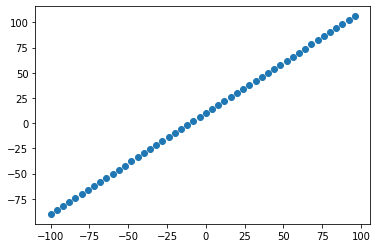

In [ ]:
plt.scatter(X,y)

#### The 3 sets ...
* Training Set- Model learns from this datawhich(70-80%)
* Validation Set - Model get tuned on this data(10-15%)
* Test Set - Model gets evaluated on this data to test what it has learn (10-15%)

In [ ]:
len(X)

50

In [ ]:
X_train=X[:40] #First 40 training samples (80% of data)
X_test=X[40:]  # Last 10 testing samples()

y_train=y[:40] #First 40 training samples (80% of data)
y_test=y[40:]  
len(X_train),len(X_test),len(y)

(40, 10, 50)

### Visualizing the data
Now we've got our data in training and test test sets

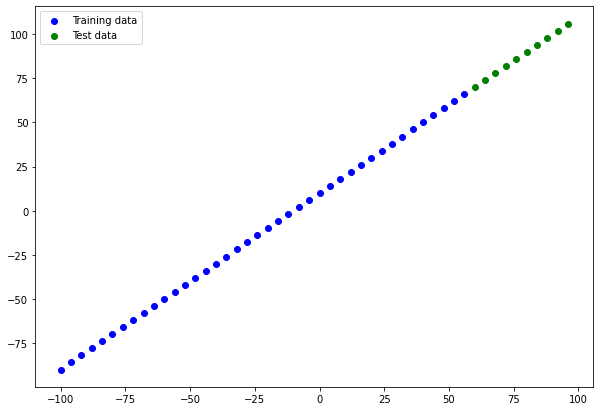

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,c='b',label='Training data')
plt.scatter(X_test,y_test,c='g',label='Test data')
plt.legend()

In [ ]:
# Let's have a look at how 

In [ ]:
# Let's create a model which builds automatically by defining input_shape
tf.random.set_seed(42)

model=tf.keras.Sequential([
    tf.keras.layers.Dense(30,input_shape=[1],name='input_layer'),      #Fully connected netowork
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1,name='output_layer')
],name="Model")

model.compile(loss=tf.keras.losses.mean_absolute_error,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['mae'])

In [ ]:
model.fit(X_train,y_train,epochs=100,verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 8ms/step - loss: 24.0160 - mae: 24.0160
Epoch 2/100
2/2 [==============================] - 0s 13ms/step - loss: 12.2057 - mae: 12.2057
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 11.0043 - mae: 11.0043
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 12.4933 - mae: 12.4933
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.9564 - mae: 10.9564
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 11.8371 - mae: 11.8371
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.8235 - mae: 8.8235
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 8.5026 - mae: 8.5026
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 8.9940 - mae: 8.9940
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 8.8222 - mae: 8.8222
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - 

In [ ]:
model.summary()

Model: "Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 30)                60        
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 output_layer (Dense)        (None, 1)                 31        
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


* Total param - total number of parameters in model 
* Train  params - these are parameters (patterns) the model can update it as trains
* Non-Trainable params - THese parameters aren't updated during parameter (When we u)

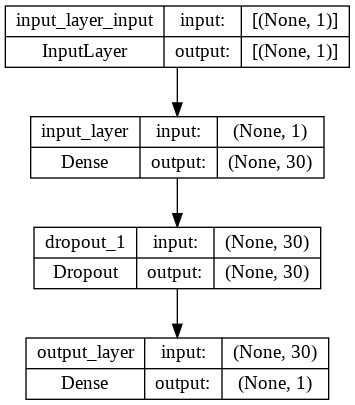

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)   #Vary handy whem we create bigger model

### Visualise our model's prediction
> Plot them against ground truth labels

often you'll see this in form of y_test or y_true versus y_pred

In [ ]:
y_pred=model.predict(X_test)
y_pred

1/1 [==============================] - 0s 107ms/step


array([[ 68.95064 ],
       [ 72.87901 ],
       [ 76.807396],
       [ 80.735756],
       [ 84.66415 ],
       [ 88.592514],
       [ 92.5209  ],
       [ 96.44927 ],
       [100.37764 ],
       [104.306015]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note** if you feel like you're going to reusee some kind functionality in future, it'a good idea to cinvert to funciton

In [ ]:
def fun_plot(train_data=X_train,
             train_labels=y_train,
             test_data=X_test,
             test_labels=y_test,
             predictions=y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="b",label="Training data")
  plt.scatter(test_data,test_labels,c="g",label="Testing data ")
  plt.scatter(test_data,predictions,c='r',label="Predictions")
  plt.legend()

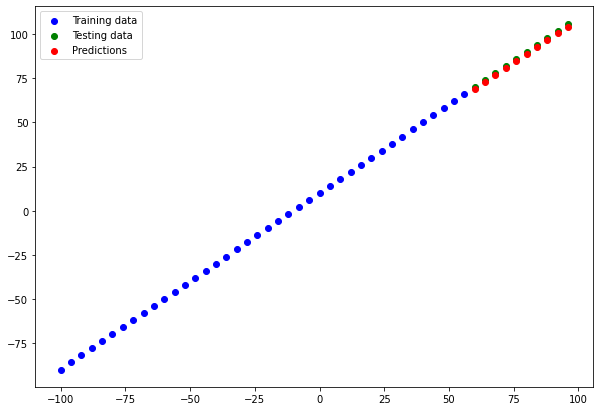

In [ ]:
fun_plot()

### Evaluating our model's prediction with regression evaluation metrics

For regression 2 main type of metrics are -

> mean absolute error
> * tf.keras.losses.mae
> * tf.metrics.mean_absolute_error()

> mean square error(WHen larger error are more significant than smaller error)

> Huber (MSE+MAE less sensative to outliers)

In [ ]:
# Evaluate model on the test 
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 258ms/step - loss: 1.3717 - mae: 1.3717


[1.3716751337051392, 1.3716751337051392]

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 68.95064 ],
       [ 72.87901 ],
       [ 76.807396],
       [ 80.735756],
       [ 84.66415 ],
       [ 88.592514],
       [ 92.5209  ],
       [ 96.44927 ],
       [100.37764 ],
       [104.306015]], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Calculate absolute error
tf.metrics.mean_absolute_error(y_true=y_test,y_pred=tf.constant(y_pred))

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([19.049362, 15.69679 , 13.115562, 11.305697, 10.267171, 10.      ,
       10.504179, 11.779709, 13.826584, 16.644812], dtype=float32)>

In [ ]:
# lets write function for evaluate of mse and mae
def mae(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true,tf.squeeze(y_pred)).numpy()
def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true,tf.squeeze(y_pred)).numpy()
def huber(y_true,y_pred):
  return tf.keras.losses.Huber(y_true,y_pred)

In [ ]:
# We can see that shape of pred and test tensor is differnet this is cause pf confusion
mae_1=mae(y_test,y_pred)

In [ ]:
# Mean square error
mse_1=mse(y_test,y_pred)

### Running experiment to improve our model
1. Get more data
2. Make model larger(more complex)
3. Train for longer

3 modelling experiments:
1. 'model-1'- train for 100 epochs
2. 'model-2'- 2layers ,trained for 100 epochs
3. 'model-3' - 2 layers,trained for 500 epochs

In [ ]:
X_train,y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
# Let's create a model which builds automatically by defining input_shape
tf.random.set_seed(42)

model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(30,input_shape=[1],name='input_layer'),      #Fully connected netowork
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1,name='output_layer')
],name="Model")

model_1.compile(loss=tf.keras.losses.mean_absolute_error,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['mse'])

model_1.fit(X_train,y_train,epochs=150)

Epoch 1/150
2/2 [==============================] - 1s 7ms/step - loss: 24.0160 - mse: 822.4147
Epoch 2/150
2/2 [==============================] - 0s 8ms/step - loss: 12.2057 - mse: 223.5804
Epoch 3/150
2/2 [==============================] - 0s 9ms/step - loss: 11.0043 - mse: 172.8970
Epoch 4/150
2/2 [==============================] - 0s 5ms/step - loss: 12.4933 - mse: 195.8985
Epoch 5/150
2/2 [==============================] - 0s 7ms/step - loss: 10.9564 - mse: 173.7109
Epoch 6/150
2/2 [==============================] - 0s 8ms/step - loss: 11.8371 - mse: 163.7250
Epoch 7/150
2/2 [==============================] - 0s 11ms/step - loss: 8.8235 - mse: 95.5598
Epoch 8/150
2/2 [==============================] - 0s 12ms/step - loss: 8.5026 - mse: 83.8218
Epoch 9/150
2/2 [==============================] - 0s 13ms/step - loss: 8.9940 - mse: 103.0085
Epoch 10/150
2/2 [==============================] - 0s 7ms/step - loss: 8.8222 - mse: 102.5001
Epoch 11/150
2/2 [==============================] - 

In [ ]:
y_pred3=model_1.predict(X_test)

1/1 [==============================] - 0s 198ms/step


In [ ]:
mae3=mae(y_test,y_pred3)
mse3=mse(y_test,y_pred3)
mae3,mse3

(2.31885, 5.4972925)

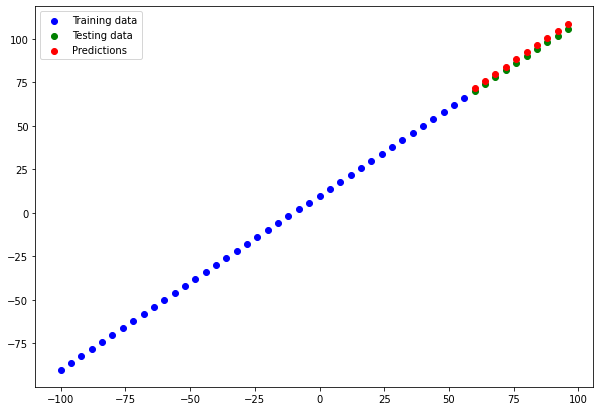

In [ ]:
fun_plot(predictions=y_pred3)

**Note**: You want to start with small experiment(small model) and make sure they work and then improve

### Compare results of our experiments

In [ ]:
import pandas as pd
model_results=[['model_1',mae_1,mse_1],
               ['model_2',mae3,mse3]]
all_results=pd.DataFrame(model_results,columns=['model','mae','mse'])
all_results

,model,mae,mse
0,model_1,1.371671,1.923805
1,model_2,2.318850,5.497293


In [ ]:
model.summary()

Model: "Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 30)                60        
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 output_layer (Dense)        (None, 1)                 31        
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


**Note**: One of your main goals should be to minimize the time between your experiments.The more experiments you do,the more things you'll figure out what doesn't work,get closure to what does work

## Tracking your experiments

1.   Track Results of experiments - TensorBoard - a component of Tensorflow library to help track modelling experiments
2. Weights & Biases- Plugs-in of TensorBoard

## Saving our model

Saving our model allows us to use them outside of google collab such as in web application or web application
1. the SavedModel foemat
2. The HDF5 format

In [ ]:
# Save model 
model.save("best_model_format")

In [ ]:
# Save model as hdf5 file
model.save('best_model_hdf5_format.h5')

## Loading in saved model

In [ ]:
saved_model=tf.keras.models.load_model("/content/best_model_format")
saved_model.summary()

Model: "Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 30)                60        
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 output_layer (Dense)        (None, 1)                 31        
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.summary()

Model: "Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 30)                60        
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 output_layer (Dense)        (None, 1)                 31        
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Compare model to saved model
model_preds=model(y_test)
smodel=saved_model(y_test)
model_preds==smodel

<tf.Tensor: shape=(10, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])>

In [ ]:
mae(y_test,model_preds)==mae(y_test,smodel)

True

In [ ]:
# Load in model using h5 model
load_h5_model=tf.keras.models.load_model('/content/best_model_hdf5_format.h5')
load_h5_model.summary()

Model: "Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 30)                60        
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 output_layer (Dense)        (None, 1)                 31        
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check predicition
h5_model=load_h5_model(y_test)
h5_model==model_preds

<tf.Tensor: shape=(10, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])>

### Download our collab file to use them outside
1. Got to 'file tab' right click and download
2. USe code
3. Save it drive by connecting drive and copying it

In [ ]:
from google.colab import files
files.download("/content/best_model_format")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save a file from google collab to google drive
!cp /content/best_model_hdf5_format.h5 /content/drive/MyDrive/Resume 

In [ ]:
!ls /content/drive/MyDrive/Resume 

 best_model_hdf5_format.h5  'Copy of Sanchay Vashist(Resume).docx.pdf'


## A larger Example

In [ ]:
# import required libraries 
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# laoad data
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Let's try one hot encoding
insurance_onehot=pd.get_dummies(insurance)
insurance_onehot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
# Create X and y values
X=insurance_onehot.drop('charges',axis=1)
y=insurance_onehot['charges']

In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
#Create training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [ ]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

In [ ]:
tf.random.set_seed(42)
#Build a neural network 
i_model=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#Compile model
i_model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

#Fit model
i_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8637.0996 - mae: 8637.0996
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7886.7769 - mae: 7886.7769
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7558.1475 - mae: 7558.1475
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7792.0220 - mae: 7792.0220
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7748.3892 - mae: 7748.3892
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 7589.9849 - mae: 7589.9849
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7698.5591 - mae: 7698.5591
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7496.7788 - mae: 7496.7788
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7493.1743 - mae: 7493.1743

**If you see loss *nan* than their is something wrong with your model**

In [ ]:
## Check reults of the insurance model
i_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3286 - mae: 7023.3286


[7023.32861328125, 7023.32861328125]

In [ ]:
y_train.median(),y_train.mean()    #To check how much wrong our predictition is

(9575.4421, 13346.089736364485)

Let's improve a model

In [ ]:
tf.random.set_seed(42)
#Build a neural network 
i_model2=tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(1)
])

#Compile model
i_model2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

#Fit model
i_model2.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13335.7412 - mae: 13335.7412
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13297.0371 - mae: 13297.0371
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13216.6406 - mae: 13216.6406
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13047.6191 - mae: 13047.6191
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 12729.6973 - mae: 12729.6973
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 12198.0381 - mae: 12198.0381
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 11403.3975 - mae: 11403.3975
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 10369.8203 - mae: 10369.8203
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 9256.2715 - mae: 9256.2715
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 8263.7363 

In [ ]:
## Check results of the insurance model
i_model2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 5929.0278 - mae: 5929.0278


[5929.02783203125, 5929.02783203125]

In [ ]:
tf.random.set_seed(42)

i_model3=tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(1)
])

i_model3.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["mae"]
                 )

history=i_model3.fit(X_train,y_train,epochs=200,batch_size=30)

Epoch 1/200
36/36 [==============================] - 1s 5ms/step - loss: 13325.1426 - mae: 13325.1426
Epoch 2/200
36/36 [==============================] - 0s 4ms/step - loss: 13167.2217 - mae: 13167.2217
Epoch 3/200
36/36 [==============================] - 0s 4ms/step - loss: 12306.5068 - mae: 12306.5068
Epoch 4/200
36/36 [==============================] - 0s 5ms/step - loss: 9497.4434 - mae: 9497.4434
Epoch 5/200
36/36 [==============================] - 0s 5ms/step - loss: 7475.7412 - mae: 7475.7412
Epoch 6/200
36/36 [==============================] - 0s 4ms/step - loss: 7400.6196 - mae: 7400.6196
Epoch 7/200
36/36 [==============================] - 0s 3ms/step - loss: 7341.5859 - mae: 7341.5859
Epoch 8/200
36/36 [==============================] - 0s 5ms/step - loss: 7299.8677 - mae: 7299.8677
Epoch 9/200
36/36 [==============================] - 0s 4ms/step - loss: 7256.4443 - mae: 7256.4443
Epoch 10/200
36/36 [==============================] - 0s 4ms/step - loss: 7216.2920 - mae: 721

In [ ]:
i_model3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 2071.7688 - mae: 2071.7688


[2071.768798828125, 2071.768798828125]

Text(0, 0.5, 'mae')

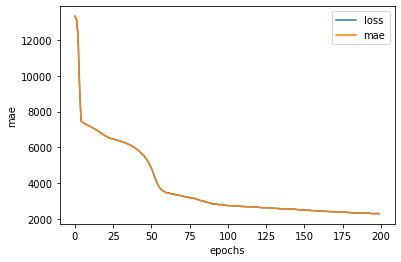

In [ ]:
# Plot history ()
plt.Figure(figsize=(10,7))
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("mae")

**How long should we train model**

It depends on problem statement

Their is solutionis called EarlyStoppingCallback,which is a TensorFlow component you can add to stop training model once it stops improving a certain metrics

**Preprocessing Data**
> Normalisation
 
> Standardization

In [ ]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


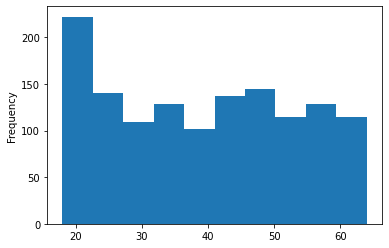

In [ ]:
X['age'].plot(kind='hist')

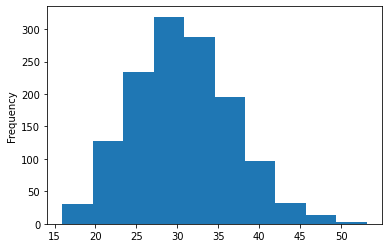

In [ ]:
X['bmi'].plot(kind='hist')

In [ ]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data,we can borrow a few classes from scikit-learn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler    #Make data more normally distributed it removes effect of outliers
from sklearn.preprocessing import MinMaxScaler      #Normalisation scale model but still preserve distribution(Common in DL)
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ct=make_column_transformer(           #Fit transformer on training data and then use it to transform test data
    (MinMaxScaler(),['age','bmi','children']),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

X=insurance.drop("charges",axis=1)
y=insurance["charges"]

#Build our train and test 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#Fit our tranformer
ct.fit(X_train)

#Transform our data
X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)

In [ ]:
X_train.iloc[0]

age                46
sex            female
bmi             19.95
children            2
smoker             no
region      northwest
Name: 560, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape,X_train_normal.shape

((1070, 6), (1070, 11))


Our data has been normalised and encoded

In [ ]:
tf.random.set_seed(42)
# Create model
i_nmodel=tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile model
i_nmodel.compile(loss=tf.keras.losses.mean_absolute_error,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

#Fit model
i_nmodel.fit(X_train_normal,y_train,epochs=100,batch_size=30)

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


36/36 [==============================] - 1s 2ms/step - loss: 12597.5488 - mae: 12597.5488
Epoch 2/100
36/36 [==============================] - 0s 2ms/step - loss: 7849.6992 - mae: 7849.6992
Epoch 3/100
36/36 [==============================] - 0s 2ms/step - loss: 6179.5508 - mae: 6179.5508
Epoch 4/100
36/36 [==============================] - 0s 2ms/step - loss: 3940.0210 - mae: 3940.0210
Epoch 5/100
36/36 [==============================] - 0s 2ms/step - loss: 3423.3921 - mae: 3423.3921
Epoch 6/100
36/36 [==============================] - 0s 2ms/step - loss: 3341.1560 - mae: 3341.1560
Epoch 7/100
36/36 [==============================] - 0s 2ms/step - loss: 3265.8792 - mae: 3265.8792
Epoch 8/100
36/36 [==============================] - 0s 2ms/step - loss: 3251.6870 - mae: 3251.6870
Epoch 9/100
36/36 [==============================] - 0s 2ms/step - loss: 3219.3347 - mae: 3219.3347
Epoch 10/100
36/36 [==============================] - 0s 2ms/step - loss: 3207.6157 - mae: 3207.6157
Epoch 11/

In [ ]:
i_nmodel.evaluate(X_train_normal,y_train)

34/34 [==============================] - 0s 1ms/step - loss: 2015.7822 - mae: 2015.7822


[2015.7822265625, 2015.7822265625]

In [ ]:
#9/9 [==============================] - 0s 2ms/step - loss: 2071.7688 - mae: 2071.7688
#[2071.768798828125, 2071.768798828125]

In [ ]:
i_model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 50)                600       
                                                                 
 dense_10 (Dense)            (None, 50)                2550      
                                                                 
 dense_11 (Dense)            (None, 50)                2550      
                                                                 
 dense_12 (Dense)            (None, 1)                 51        
                                                                 
Total params: 5,751
Trainable params: 5,751
Non-trainable params: 0
_________________________________________________________________
